In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [46]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<H1> Exploratory Data </H1>

In [12]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

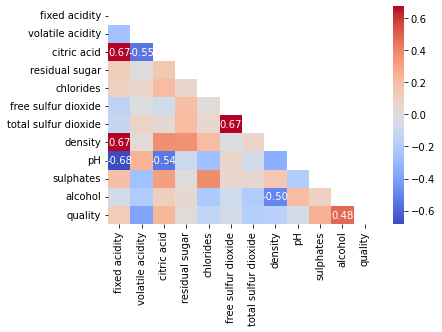

In [16]:
mask = np.triu(df.corr())

ax = sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt="0.2f", mask = mask)
for t in ax.texts:
    if float(t.get_text()) >= 0.4 or float(t.get_text()) <= -0.4:
        t.set_text(t.get_text())
    else:
        t.set_text("")

<H1> Data Preprocessing </H1>

In [47]:
selected_features = ['fixed acidity', 'pH']
X = df[selected_features]

In [48]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [49]:
print(X)

[[0.24778761 0.60629921]
 [0.28318584 0.36220472]
 [0.28318584 0.40944882]
 ...
 [0.15044248 0.53543307]
 [0.11504425 0.65354331]
 [0.12389381 0.51181102]]


In [50]:
print(X.shape)

(1599, 2)


In [51]:
has_missing_values = np.isnan(X).any()

if has_missing_values:
    print("The data contains missing values.")
else:
    print("No missing values in the data.")

No missing values in the data.


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


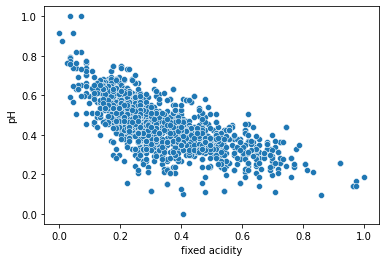

In [52]:
sns.scatterplot(X[:,0], X[:, 1])
plt.xlabel('fixed acidity')
plt.ylabel('pH')
plt.show()

In [53]:
X = np.array(X)
X

array([[0.24778761, 0.60629921],
       [0.28318584, 0.36220472],
       [0.28318584, 0.40944882],
       ...,
       [0.15044248, 0.53543307],
       [0.11504425, 0.65354331],
       [0.12389381, 0.51181102]])

<H2> K-means Clustering </H2>

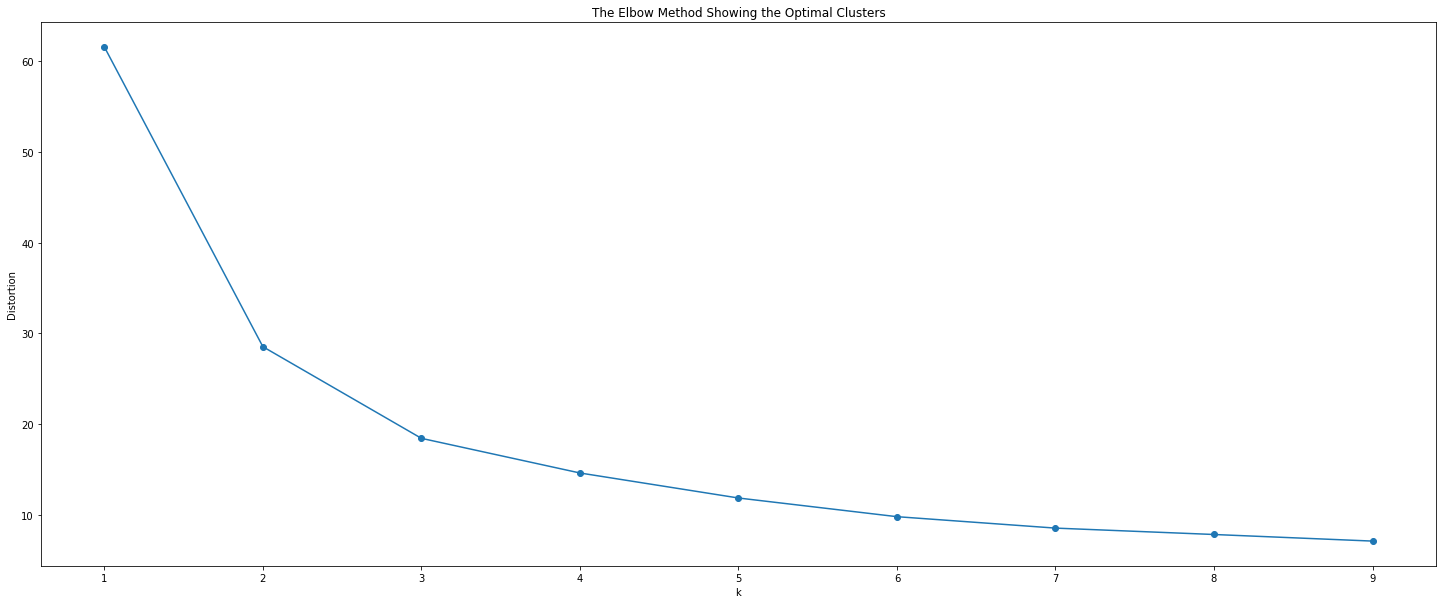

In [24]:
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize = (25, 10))
plt.plot(K, distortions, 'o-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method Showing the Optimal Clusters')
plt.show()

In [25]:
optimal_k = 3

In [26]:
kmeans = KMeans(n_clusters = optimal_k, random_state = 42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [27]:
df['cluster'] = kmeans.labels_

In [29]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

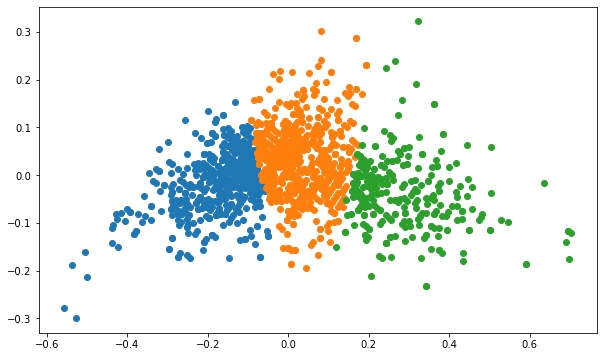

In [31]:
plt.figure(figsize = (10, 6))
for cluster in df['cluster'].unique():
    plt.scatter(df[df['cluster'] == cluster]['PCA1'],
                df[df['cluster'] == cluster]['PCA2'],
                label=f'Cluster {cluster}')

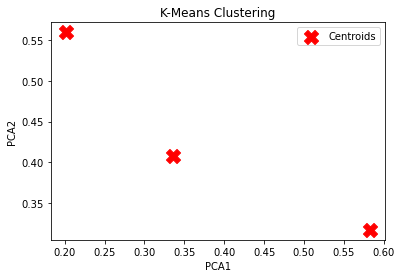

In [32]:
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'X', s = 200, c = 'red', label = 'Centroids')

plt.title('K-Means Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [33]:
silhouette_avg = "{:.2f}".format(silhouette_score(X, kmeans.labels_))

print(f"Silhouette Score for K-Means Clustering: {silhouette_avg}")

Silhouette Score for K-Means Clustering: 0.40


<H2> Agglomerative Clustering </H2>

In [43]:
n_clusters = 3 
agg_clustering = AgglomerativeClustering(n_clusters = n_clusters, linkage = 'ward')
agg_labels = agg_clustering.fit_predict(X)

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


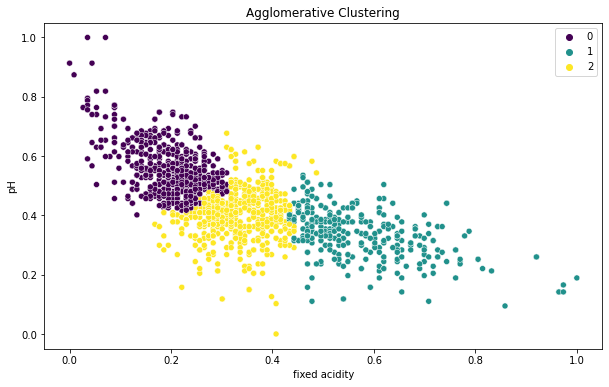

In [44]:
plt.figure(figsize = (10, 6))
sns.scatterplot(X[:, 0], X[:, 1], hue = agg_labels, palette = 'viridis', legend = 'full')
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title('Agglomerative Clustering')
plt.show()

In [45]:
silhouette_avg = "{:.2f}".format(silhouette_score(X, agg_labels))

print(f"Silhouette Score for Agglomerative Clustering: {silhouette_avg}")

Silhouette Score for Agglomerative Clustering: 0.38


<H2> DBScan </H2>

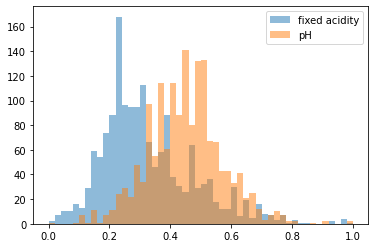

In [54]:
plt.hist(X[:, 0], bins=50, alpha=0.5, label='fixed acidity')
plt.hist(X[:, 1], bins=50, alpha=0.5, label='pH')
plt.legend()
plt.show()

In [55]:
eps = 0.4
min_samples = 15
dbscan = DBSCAN(eps = eps, min_samples = min_samples)
dbscan_labels = dbscan.fit_predict(X)

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


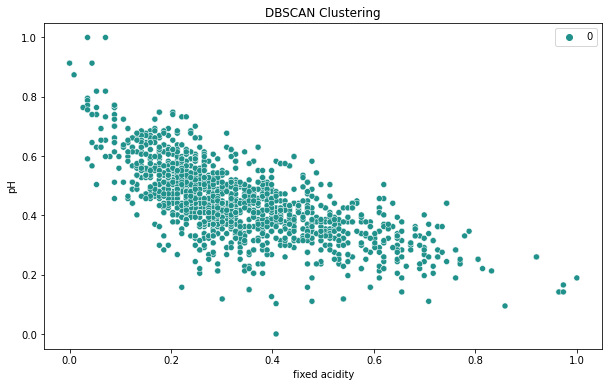

In [56]:
plt.figure(figsize = (10, 6))
sns.scatterplot(X[:, 0], X[:, 1], hue = dbscan_labels, palette ='viridis', legend = 'full')
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title('DBSCAN Clustering')
plt.show()

In [57]:
unique_labels = np.unique(dbscan_labels)

if len(unique_labels) > 1:
    silhouette_avg = silhouette_score(X[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print(f"Silhouette Score: {silhouette_avg}")
    
else:
    print("DBSCAN resulted in only one unique label or all noise points.")

DBSCAN resulted in only one unique label or all noise points.
